# Subplots

You've seen in previous notebooks cases when we've subdivided a single Figure into multiple Axes. This chapter will focus on exactly that.

This time we will not change the style to seaborn as it removes the borders of the plot and becomes much harder to differentiate the various plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')  # Let's ignore it to better view the subplots

# `plt.axes()` - Manually creating Axes

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html?highlight=axes#matplotlib.pyplot.axes)

This function receives a list of four numbers ranging from 0 to 1: [left, bottom, width, height].
- `left`: Position from the left 
- `bottom`: Position from the bottom
- `width`: Width as a percentage
- `height`: Height as a percentage

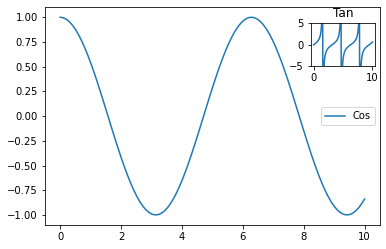

In [2]:
x = np.linspace(0, 10, 100)

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.74, 0.675, 0.15, 0.15])

ax1.plot(x, np.cos(x), label='Cos')
ax1.legend(loc='right')
ax2.plot(x, np.tan(x))
ax2.set_title('Tan')
ax2.set_ylim(-5, 5);

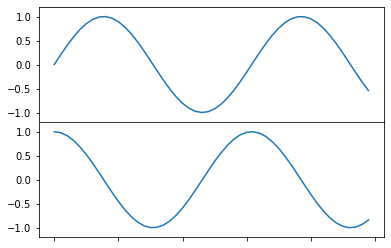

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2), sharex=ax1)

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

# `plt.subplots()` - Tile based subplots

This function can save a lot of hassle because most times we want tiled subplots and don't need to do the manual calculations ourselves.

There are also more arguments such as `sharex` and `sharey` that guarantee that 

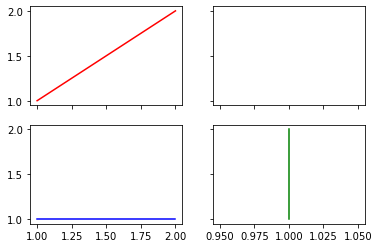

In [4]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row')
axs[0, 0].plot([1, 2], [1, 2], c='r')
axs[1, 0].plot([1, 2], [1, 1], c='b')
axs[1, 1].plot([1, 1], [1, 2], c='g')

# `plt.GridSpec()` - Complex subdivisions

There is another useful matplotlib class not mentioned yet: `GridSpec`. This class represents a grid layout to place subplots within a figure.

The signature of this method associated to a figure is `add_gridspec(self, nrows=1, ncols=1, **kwargs)`. Some of the most useful arguments are:
- `wspace`: The space reserved between subplots expressed as a fraction of the average axis width
- `hspace`: The space reserved between subplots expressed as a fraction of the average axis height
- `width_ratios`: A list with the width of each subplot
- `height_ratios`: A list with the height of each subplot

We can easily create subplots from this object by accessing it via indexing, just like we did with `np.ndarray`. Another advantage of using this method is that you can easily customize extra parameters that would be harder to do either manually or with the grid.

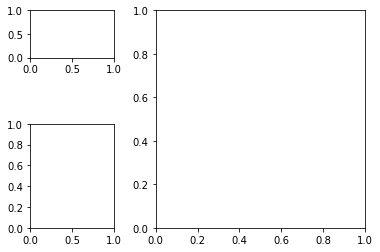

In [5]:
fig = plt.figure()
gs = fig.add_gridspec(4, 3, wspace=0.5)
ax1 = fig.add_subplot(gs[0, 0])
# spans two cols:
ax3 = fig.add_subplot(gs[2:, 0])
# spans two rows and cols:
ax4 = fig.add_subplot(gs[:, 1:])

An example of a complex plot using these methods can be found in [maptlotlib's examples](https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html#sphx-glr-gallery-axes-grid1-scatter-hist-locatable-axes-py):

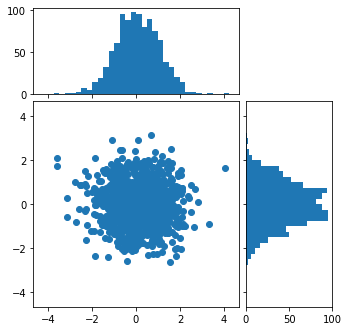

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()